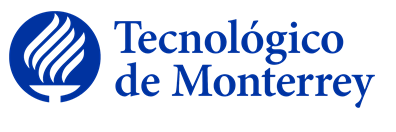

###Maestría en Inteligencia Artificial Aplicada
###**Curso: Ciencia y Analítica de Datos**

###Profesora: Dra. María de la Paz Rico Fernández

###Alumno: Francisco Javier Ramírez Arias
###Matrícula: A01316379

###Alumno: Jesús Angel Rincón Ruiz
###Matrícula: A01793960



###**Objetivo:**

###Implementar conocimientos adquiridos a lo largo de curso en el desarrollo de un proyecto con datos reales. 

In [1]:
#Carga de Librerias
import numpy as np
import matplotlib as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib

from sklearn import metrics
from sklearn.metrics import r2_score

! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 11.9 MB/s 
     |████████████████████████████████| 1.0 MB 51.7 MB/s 
     |████████████████████████████████| 1.7 MB 52.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 63.6 MB/s 
     |████████████████████████████████| 6.3 MB 59.9 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=d3955ddd5ae4ab3e20e026278957bb1b6edd628e642193784752c455dc60f17a
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=1f88ec95f52aeef4ac55fb1839a44336ba8ac63f1894dc90800e6d8597909148
  Stored in directory: /root/

#Parte 1

In [2]:
#Lectura de la Base de Datos de Aguas Subterraneas
df = pd.read_csv('/content/sample_data/AguasSubterraneas_2020.csv',encoding='cp1252')
df.sample(10)

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
273,DLEST6147,SITIO No. 11 NORIA IMSS,LERMA SANTIAGO PACIFICO,MEXICO,ZINACANTEPEC,VALLE DE TOLUCA,NORIA,-99.733256,19.290975,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
289,DLGUA1036,RODEO DE AYALA,LERMA SANTIAGO PACIFICO,GUANAJUATO,PENJAMO,PENJAMO-ABASOLO,POZO,-101.625050,20.485330,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
882,OCNOR6506,URES.,NOROESTE,SONORA,URES,RIO SONORA,POZO,-110.382940,29.424050,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
878,OCNOR6264,LA MORA,NOROESTE,SONORA,BANAMICHI,RIO SONORA,POZO,-110.204800,29.977650,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
821,OCNOR4036,EL REAL DEL CATORCE,NOROESTE,SONORA,HERMOSILLO,COSTA DE HERMOSILLO,POZO,-111.055560,28.961570,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
192,DLDUR654,POZO PRESIDIOS,CUENCAS CENTRALES DEL NORTE,DURANGO,TEPEHUANES,TEPEHUANES-SANTIAGO,POZO,-105.628800,25.282450,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
557,DLZAC2613,POZO 524 AGUA POTABLE RANCHO NUEVO (SUSTITUTO ...,CUENCAS CENTRALES DEL NORTE,ZACATECAS,ZACATECAS,BENITO JUAREZ,POZO,-102.736960,22.754910,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
870,OCNOR4224M1,POZO QUITOVAC,NOROESTE,SONORA,GENERAL PLUTARCO ELIAS CALLES,SONOYTA-PUERTO PEÑASCO,POZO,-112.750556,31.515833,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
209,DLDUR691,POZO 3 PEÑON BLANCO,CUENCAS CENTRALES DEL NORTE,DURANGO,PEÑON BLANCO,PEÑON BLANCO,POZO,-104.027790,24.790060,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
498,DLSAN5384,EL HUIZACHE CNA-11-248,CUENCAS CENTRALES DEL NORTE,SAN LUIS POTOSI,SOLEDAD DE GRACIANO SANCHEZ,SAN LUIS POTOSI,POZO,-100.853056,22.236667,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [3]:
#¿Que tipo de dato son las variables del conjunto de Datos?
df.dtypes

CLAVE                    object
SITIO                    object
ORGANISMO_DE_CUENCA      object
ESTADO                   object
MUNICIPIO                object
ACUIFERO                 object
SUBTIPO                  object
LONGITUD                float64
LATITUD                 float64
PERIODO                   int64
ALC_mg/L                float64
CALIDAD_ALC              object
CONDUCT_mS/cm           float64
CALIDAD_CONDUC           object
SDT_mg/L                float64
SDT_M_mg/L               object
CALIDAD_SDT_ra           object
CALIDAD_SDT_salin        object
FLUORUROS_mg/L           object
CALIDAD_FLUO             object
DUR_mg/L                 object
CALIDAD_DUR              object
COLI_FEC_NMP/100_mL      object
CALIDAD_COLI_FEC         object
N_NO3_mg/L               object
CALIDAD_N_NO3            object
AS_TOT_mg/L              object
CALIDAD_AS               object
CD_TOT_mg/L              object
CALIDAD_CD               object
CR_TOT_mg/L              object
CALIDAD_

In [4]:
#¿Cuantas variables de cada tipo de dato tenemos en nuestro Dataset?
df.dtypes.value_counts()

object     51
float64     5
int64       1
dtype: int64

In [5]:
#Revisemos cual es la dimención de nuetro Dataset.
df.shape

(1068, 57)

###Este archivo contiene la calidad del agua de **1,068 sitios subterráneos** en México; calificando su calidad con base en cada uno de los Indicadores y sus respectivas escalas.

###Se incluyen las coordenadas geográficas y datos generales de ubicación de cada sitio.

In [6]:
#Confirmemos si en nuestros Dataset tenemos valore nulos/faltantes
df.isnull().any()

CLAVE                   False
SITIO                   False
ORGANISMO_DE_CUENCA     False
ESTADO                  False
MUNICIPIO               False
ACUIFERO                False
SUBTIPO                 False
LONGITUD                False
LATITUD                 False
PERIODO                 False
ALC_mg/L                 True
CALIDAD_ALC              True
CONDUCT_mS/cm            True
CALIDAD_CONDUC           True
SDT_mg/L                 True
SDT_M_mg/L               True
CALIDAD_SDT_ra           True
CALIDAD_SDT_salin        True
FLUORUROS_mg/L          False
CALIDAD_FLUO            False
DUR_mg/L                 True
CALIDAD_DUR              True
COLI_FEC_NMP/100_mL     False
CALIDAD_COLI_FEC        False
N_NO3_mg/L               True
CALIDAD_N_NO3            True
AS_TOT_mg/L             False
CALIDAD_AS              False
CD_TOT_mg/L             False
CALIDAD_CD              False
CR_TOT_mg/L             False
CALIDAD_CR              False
HG_TOT_mg/L             False
CALIDAD_HG

In [7]:
#Veamos cuantos valores nulos tenemos por variable
df.isnull().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

In [8]:
#En total tendriamos 1532 datos nulos.
df.isnull().sum().sum()

1532

In [9]:
#Mostramos las columnas para posteriormente revisar los diferentes tipos de valores que se presentan en algunas de ellas.
df.columns

Index(['CLAVE', 'SITIO', 'ORGANISMO_DE_CUENCA', 'ESTADO', 'MUNICIPIO',
       'ACUIFERO', 'SUBTIPO', 'LONGITUD', 'LATITUD', 'PERIODO', 'ALC_mg/L',
       'CALIDAD_ALC', 'CONDUCT_mS/cm', 'CALIDAD_CONDUC', 'SDT_mg/L',
       'SDT_M_mg/L', 'CALIDAD_SDT_ra', 'CALIDAD_SDT_salin', 'FLUORUROS_mg/L',
       'CALIDAD_FLUO', 'DUR_mg/L', 'CALIDAD_DUR', 'COLI_FEC_NMP/100_mL',
       'CALIDAD_COLI_FEC', 'N_NO3_mg/L', 'CALIDAD_N_NO3', 'AS_TOT_mg/L',
       'CALIDAD_AS', 'CD_TOT_mg/L', 'CALIDAD_CD', 'CR_TOT_mg/L', 'CALIDAD_CR',
       'HG_TOT_mg/L', 'CALIDAD_HG', 'PB_TOT_mg/L', 'CALIDAD_PB', 'MN_TOT_mg/L',
       'CALIDAD_MN', 'FE_TOT_mg/L', 'CALIDAD_FE', 'SEMAFORO', 'CONTAMINANTES',
       'CUMPLE_CON_ALC', 'CUMPLE_CON_COND', 'CUMPLE_CON_SDT_ra',
       'CUMPLE_CON_SDT_salin', 'CUMPLE_CON_FLUO', 'CUMPLE_CON_DUR',
       'CUMPLE_CON_CF', 'CUMPLE_CON_NO3', 'CUMPLE_CON_AS', 'CUMPLE_CON_CD',
       'CUMPLE_CON_CR', 'CUMPLE_CON_HG', 'CUMPLE_CON_PB', 'CUMPLE_CON_MN',
       'CUMPLE_CON_FE'],
      dtype='

In [10]:
df["PERIODO"].value_counts()

2020    1068
Name: PERIODO, dtype: int64

In [11]:
df["CONTAMINANTES"].value_counts()

FLUO,                                            78
DT,                                              65
FLUO,AS,                                         51
CF,                                              31
AS,                                              31
                                                 ..
ALC,CONDUC,SDT_ra,SDT_salin,DT,NO3,               1
ALC,CONDUC,SDT_ra,SDT_salin,FLUO,DT,AS,MN,FE,     1
PB,MN,FE,                                         1
ALC,AS,FE,                                        1
ALC,DT,NO3,                                       1
Name: CONTAMINANTES, Length: 126, dtype: int64



###Observamos que nuestra variable **Valor de Alcalinidad Total en miligramos por litro(SDT_mg/L)** cuenta con **1068 valores nulos**, esto implica el 100% de las muestras por lo que se eliminara de nuestro Dataset.

###La variable **Contaminantes** cuenta con 434 valores nulos sin embargo esto es debido a que estas muestras(Sitios Subterranos) no presentan algun tipo de contaminación que se describa con esta variable, por lo que se mantiene en el Dataset.

###Las Variable **ALC_mg/L** presentan 4 Sitios Subterraneos sin valor, por consecuencía **CALIDAD_ALC** presenta los mismos datos nulos, la cantidad de datos nulos no es representativo para la muestra por lo que seran eliminados.

###Se presenta este mismo caso para las variables **CONDUCT_mS/cm**, **CALIDAD_CONDUC**, **CONDUCT_mS/cm**,**CALIDAD_CONDUC**,**SDT_M_mg/L** **CALIDAD_SDT_ra**,**CALIDAD_SDT_salin**, **DUR_mg/L**, **CALIDAD_DUR** que seran eliminadas sus muestras con valores nulos.

###La columna **"FECHA"** presenta el mismo valor para todas las muestras por lo que no sera relevante en nuestro analisis y sera eliminada.

In [12]:
#Agregaremos un valor a la Variable Contaminantes a aquellos valores nulos que indican que no hay presencia de contaminantes
#para posteriormente eliminar los valores nulos del resto del Dataset.

df["CONTAMINANTES"].fillna("OK", inplace= True)


In [13]:
#Observamos que los valores nulos de la Columna "CONTAMINANTES" fueron llenados con "OK" como indicación que no hay presencia de Contaminantes.
df["CONTAMINANTES"].value_counts()

OK                                               434
FLUO,                                             78
DT,                                               65
FLUO,AS,                                          51
CF,                                               31
                                                ... 
ALC,FLUO,AS,FE,                                    1
ALC,CONDUC,SDT_ra,SDT_salin,FLUO,DT,AS,MN,FE,      1
PB,MN,FE,                                          1
ALC,AS,FE,                                         1
ALC,DT,NO3,                                        1
Name: CONTAMINANTES, Length: 127, dtype: int64

In [14]:
#Eliminamos la columna "SDT_mg/L"
Clean_df= df.drop(["SDT_mg/L"],axis=1)

In [15]:
#Eliminamos las muestras con datos nulos.
Clean_df.dropna(inplace=True)


In [16]:
#Comprobamos que nuestro Dataset se encuentra libre de Datos nulos y Variables que al momento no se consideran de relevancia para el analisis.
Clean_df.isnull().sum()

CLAVE                   0
SITIO                   0
ORGANISMO_DE_CUENCA     0
ESTADO                  0
MUNICIPIO               0
ACUIFERO                0
SUBTIPO                 0
LONGITUD                0
LATITUD                 0
PERIODO                 0
ALC_mg/L                0
CALIDAD_ALC             0
CONDUCT_mS/cm           0
CALIDAD_CONDUC          0
SDT_M_mg/L              0
CALIDAD_SDT_ra          0
CALIDAD_SDT_salin       0
FLUORUROS_mg/L          0
CALIDAD_FLUO            0
DUR_mg/L                0
CALIDAD_DUR             0
COLI_FEC_NMP/100_mL     0
CALIDAD_COLI_FEC        0
N_NO3_mg/L              0
CALIDAD_N_NO3           0
AS_TOT_mg/L             0
CALIDAD_AS              0
CD_TOT_mg/L             0
CALIDAD_CD              0
CR_TOT_mg/L             0
CALIDAD_CR              0
HG_TOT_mg/L             0
CALIDAD_HG              0
PB_TOT_mg/L             0
CALIDAD_PB              0
MN_TOT_mg/L             0
CALIDAD_MN              0
FE_TOT_mg/L             0
CALIDAD_FE  

In [17]:
Clean_df.shape

(1054, 56)

###Ya con nuestro Dataset limpio continuaremos explorando

In [18]:
#Visualisemos la distribución de los sitios subterraneos por su ubicación(Estado)
gb = df.groupby('ESTADO').apply(len)
gb

ESTADO
AGUASCALIENTES                      14
BAJA CALIFORNIA                     31
BAJA CALIFORNIA SUR                 49
CAMPECHE                            25
CHIAPAS                             21
CHIHUAHUA                           35
COAHUILA DE ZARAGOZA                59
COLIMA                              26
DISTRITO FEDERAL                     2
DURANGO                            121
GUANAJUATO                          41
GUERRERO                             5
HIDALGO                             37
JALISCO                             33
MEXICO                              24
MICHOACAN DE OCAMPO                 27
MORELOS                             11
NAYARIT                              8
NUEVO LEON                          15
OAXACA                              20
PUEBLA                              23
QUERETARO ARTEAGA                    6
QUINTANA ROO                        15
SAN LUIS POTOSI                     47
SINALOA                             32
SONORA            

In [19]:
#Subtipo de cuerpo de agua donde se encuentra el sitio de muestreo 
geb = df.groupby('SUBTIPO').apply(len)
geb

SUBTIPO
BOMBEO CENOTE       1
CENOTE              7
DESCARGA            1
MANANTIAL          12
NORIA               3
POZO             1039
POZO NORIA          4
Pozo                1
dtype: int64

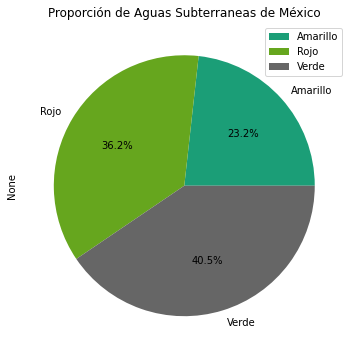

In [20]:
#Veamos la proporción de nuestra variable "SEMAFORO" la cual nos indica el nivel de contaminacion de acuerdo a los contaminantes presentes
gsb = Clean_df.groupby('SEMAFORO').apply(len)
gsb.plot(kind='pie', title = 'Proporción de Aguas Subterraneas de México', 
cmap='Dark2', autopct="%.1f%%", figsize = (10,6), legend=True);

In [21]:
#Describamos nuestros datos numericos.
Clean_df.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm
count,1054.000000,1054.000000,1054.0,1054.000000,1054.000000
mean,-101.848270,23.161796,2020.0,234.695266,1142.726471
std,6.697568,3.875005,0.0,111.147849,1248.990617
min,-116.664250,14.561150,2020.0,26.640000,110.000000
25%,-105.385170,20.224857,2020.0,164.257500,506.000000
50%,-102.170665,22.640705,2020.0,215.825000,820.000000
75%,-98.971268,25.508770,2020.0,292.930000,1328.000000
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000


In [22]:
#Notamos que la función describe dejo fuera algunos otras variables numericas por incluir el simbolo de desigualdad "<" como 'SDT_M_mg/L','DUR_mg/L', etc.
#Cambiemos este tipo de valor a numerico.

Clean_df['SDT_M_mg/L'] = Clean_df['SDT_M_mg/L'].str.replace('<', '')
Clean_df['SDT_M_mg/L'] = pd.to_numeric(Clean_df['SDT_M_mg/L'])

Clean_df['FLUORUROS_mg/L'] = Clean_df['FLUORUROS_mg/L'].str.replace('<', '')
Clean_df['FLUORUROS_mg/L'] = pd.to_numeric(Clean_df['FLUORUROS_mg/L'])

Clean_df['DUR_mg/L'] = Clean_df['DUR_mg/L'].str.replace('<', '')
Clean_df['DUR_mg/L'] = pd.to_numeric(Clean_df['DUR_mg/L'])

Clean_df['COLI_FEC_NMP/100_mL'] = Clean_df['COLI_FEC_NMP/100_mL'].str.replace('<', '')
Clean_df['COLI_FEC_NMP/100_mL'] = pd.to_numeric(Clean_df['COLI_FEC_NMP/100_mL'])

Clean_df['N_NO3_mg/L'] = Clean_df['N_NO3_mg/L'].str.replace('<', '')
Clean_df['N_NO3_mg/L'] = pd.to_numeric(Clean_df['N_NO3_mg/L'])

Clean_df['AS_TOT_mg/L'] = Clean_df['AS_TOT_mg/L'].str.replace('<', '')
Clean_df['AS_TOT_mg/L'] = pd.to_numeric(Clean_df['AS_TOT_mg/L'])

Clean_df['CD_TOT_mg/L'] = Clean_df['CD_TOT_mg/L'].str.replace('<', '')
Clean_df['CD_TOT_mg/L'] = pd.to_numeric(Clean_df['CD_TOT_mg/L'])

Clean_df['CR_TOT_mg/L'] = Clean_df['CR_TOT_mg/L'].str.replace('<', '')
Clean_df['CR_TOT_mg/L'] = pd.to_numeric(Clean_df['CR_TOT_mg/L'])

Clean_df['HG_TOT_mg/L'] = Clean_df['HG_TOT_mg/L'].str.replace('<', '')
Clean_df['HG_TOT_mg/L'] = pd.to_numeric(Clean_df['HG_TOT_mg/L'])

Clean_df['PB_TOT_mg/L'] = Clean_df['PB_TOT_mg/L'].str.replace('<', '')
Clean_df['PB_TOT_mg/L'] = pd.to_numeric(Clean_df['PB_TOT_mg/L'])

Clean_df['MN_TOT_mg/L'] = Clean_df['MN_TOT_mg/L'].str.replace('<', '')
Clean_df['MN_TOT_mg/L'] = pd.to_numeric(Clean_df['MN_TOT_mg/L'])

Clean_df['FE_TOT_mg/L'] = Clean_df['FE_TOT_mg/L'].str.replace('<', '')
Clean_df['FE_TOT_mg/L'] = pd.to_numeric(Clean_df['FE_TOT_mg/L'])




In [23]:
#Describamos nuevamente nuestros datos numericos.
Clean_df.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
count,1054.000000,1054.000000,1054.0,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.00000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,-101.848270,23.161796,2020.0,234.695266,1142.726471,896.945797,1.078547,349.893584,359.734156,4.321651,0.019504,0.00303,0.013353,0.000557,0.005285,0.072960,0.412234
std,6.697568,3.875005,0.0,111.147849,1248.990617,2765.757924,1.931204,360.960153,2065.705773,8.378332,0.035051,0.00090,0.155412,0.000470,0.003276,0.378856,5.574307
min,-116.664250,14.561150,2020.0,26.640000,110.000000,101.200000,0.200000,20.000000,1.100000,0.020000,0.010000,0.00300,0.005000,0.000500,0.005000,0.001500,0.025000
25%,-105.385170,20.224857,2020.0,164.257500,506.000000,338.050000,0.269475,121.512000,1.100000,0.651667,0.010000,0.00300,0.005000,0.000500,0.005000,0.001500,0.025000
50%,-102.170665,22.640705,2020.0,215.825000,820.000000,551.400000,0.506950,245.994450,1.100000,2.082916,0.010000,0.00300,0.005000,0.000500,0.005000,0.001500,0.046900
75%,-98.971268,25.508770,2020.0,292.930000,1328.000000,915.600000,1.142400,455.617200,10.750000,5.190385,0.010000,0.00300,0.005000,0.000500,0.005000,0.009830,0.172275
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,82170.000000,34.803300,3810.692200,24196.000000,121.007813,0.452200,0.03211,5.003200,0.014150,0.080900,8.982000,178.615000


In [24]:
#Dejemos fuera las variables de "LONGITUD", "LATITUD" y "PERIODO" para seguir explorando nuestros datos
df_explore = Clean_df[["ALC_mg/L","CONDUCT_mS/cm","SDT_M_mg/L","FLUORUROS_mg/L","DUR_mg/L","COLI_FEC_NMP/100_mL","N_NO3_mg/L","AS_TOT_mg/L","CD_TOT_mg/L","CR_TOT_mg/L","HG_TOT_mg/L",
                 "PB_TOT_mg/L","MN_TOT_mg/L","FE_TOT_mg/L"]].copy()


In [25]:
#Media de nuestros datos númericos
df_explore.mean()

ALC_mg/L                234.695266
CONDUCT_mS/cm          1142.726471
SDT_M_mg/L              896.945797
FLUORUROS_mg/L            1.078547
DUR_mg/L                349.893584
COLI_FEC_NMP/100_mL     359.734156
N_NO3_mg/L                4.321651
AS_TOT_mg/L               0.019504
CD_TOT_mg/L               0.003030
CR_TOT_mg/L               0.013353
HG_TOT_mg/L               0.000557
PB_TOT_mg/L               0.005285
MN_TOT_mg/L               0.072960
FE_TOT_mg/L               0.412234
dtype: float64

In [26]:
#Mediana de nuestros datos númericos
df_explore.median()

ALC_mg/L               215.825000
CONDUCT_mS/cm          820.000000
SDT_M_mg/L             551.400000
FLUORUROS_mg/L           0.506950
DUR_mg/L               245.994450
COLI_FEC_NMP/100_mL      1.100000
N_NO3_mg/L               2.082916
AS_TOT_mg/L              0.010000
CD_TOT_mg/L              0.003000
CR_TOT_mg/L              0.005000
HG_TOT_mg/L              0.000500
PB_TOT_mg/L              0.005000
MN_TOT_mg/L              0.001500
FE_TOT_mg/L              0.046900
dtype: float64

In [27]:
#Valores maximos de nuestros datos númericos
df_explore.max()

ALC_mg/L                1650.000000
CONDUCT_mS/cm          18577.000000
SDT_M_mg/L             82170.000000
FLUORUROS_mg/L            34.803300
DUR_mg/L                3810.692200
COLI_FEC_NMP/100_mL    24196.000000
N_NO3_mg/L               121.007813
AS_TOT_mg/L                0.452200
CD_TOT_mg/L                0.032110
CR_TOT_mg/L                5.003200
HG_TOT_mg/L                0.014150
PB_TOT_mg/L                0.080900
MN_TOT_mg/L                8.982000
FE_TOT_mg/L              178.615000
dtype: float64

In [28]:
#Valores minimos de nuestros datos númericos
df_explore.min()

ALC_mg/L                26.6400
CONDUCT_mS/cm          110.0000
SDT_M_mg/L             101.2000
FLUORUROS_mg/L           0.2000
DUR_mg/L                20.0000
COLI_FEC_NMP/100_mL      1.1000
N_NO3_mg/L               0.0200
AS_TOT_mg/L              0.0100
CD_TOT_mg/L              0.0030
CR_TOT_mg/L              0.0050
HG_TOT_mg/L              0.0005
PB_TOT_mg/L              0.0050
MN_TOT_mg/L              0.0015
FE_TOT_mg/L              0.0250
dtype: float64

In [29]:
#Valores desviación estandar de nuestros datos númericos
df_explore.std()

ALC_mg/L                111.147849
CONDUCT_mS/cm          1248.990617
SDT_M_mg/L             2765.757924
FLUORUROS_mg/L            1.931204
DUR_mg/L                360.960153
COLI_FEC_NMP/100_mL    2065.705773
N_NO3_mg/L                8.378332
AS_TOT_mg/L               0.035051
CD_TOT_mg/L               0.000900
CR_TOT_mg/L               0.155412
HG_TOT_mg/L               0.000470
PB_TOT_mg/L               0.003276
MN_TOT_mg/L               0.378856
FE_TOT_mg/L               5.574307
dtype: float64

In [30]:
#Media de nuestros datos númericos
df_explore.var()

ALC_mg/L               1.235384e+04
CONDUCT_mS/cm          1.559978e+06
SDT_M_mg/L             7.649417e+06
FLUORUROS_mg/L         3.729549e+00
DUR_mg/L               1.302922e+05
COLI_FEC_NMP/100_mL    4.267140e+06
N_NO3_mg/L             7.019645e+01
AS_TOT_mg/L            1.228557e-03
CD_TOT_mg/L            8.102546e-07
CR_TOT_mg/L            2.415279e-02
HG_TOT_mg/L            2.206552e-07
PB_TOT_mg/L            1.073068e-05
MN_TOT_mg/L            1.435322e-01
FE_TOT_mg/L            3.107290e+01
dtype: float64

[]

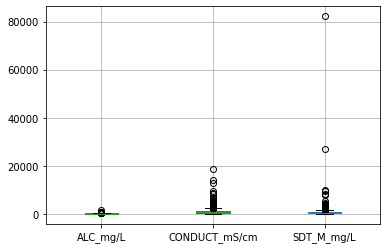

In [31]:
#Explemos nuestros datos a traves de Boxplot
b_plot = df_explore.boxplot(column = ["ALC_mg/L","CONDUCT_mS/cm","SDT_M_mg/L",]) 
b_plot.plot()
#plot.show()

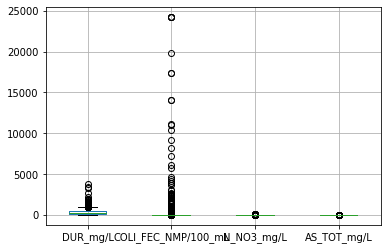

In [32]:
boxplot = df_explore.boxplot(column=["DUR_mg/L","COLI_FEC_NMP/100_mL","N_NO3_mg/L","AS_TOT_mg/L"])  

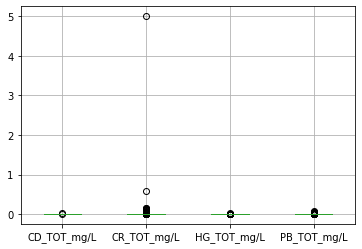

In [33]:
boxplot = df_explore.boxplot(column=["CD_TOT_mg/L","CR_TOT_mg/L","HG_TOT_mg/L","PB_TOT_mg/L"])  

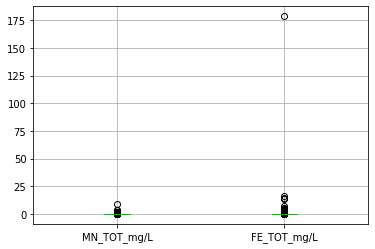

In [34]:
boxplot = df_explore.boxplot(column=["MN_TOT_mg/L","FE_TOT_mg/L"])

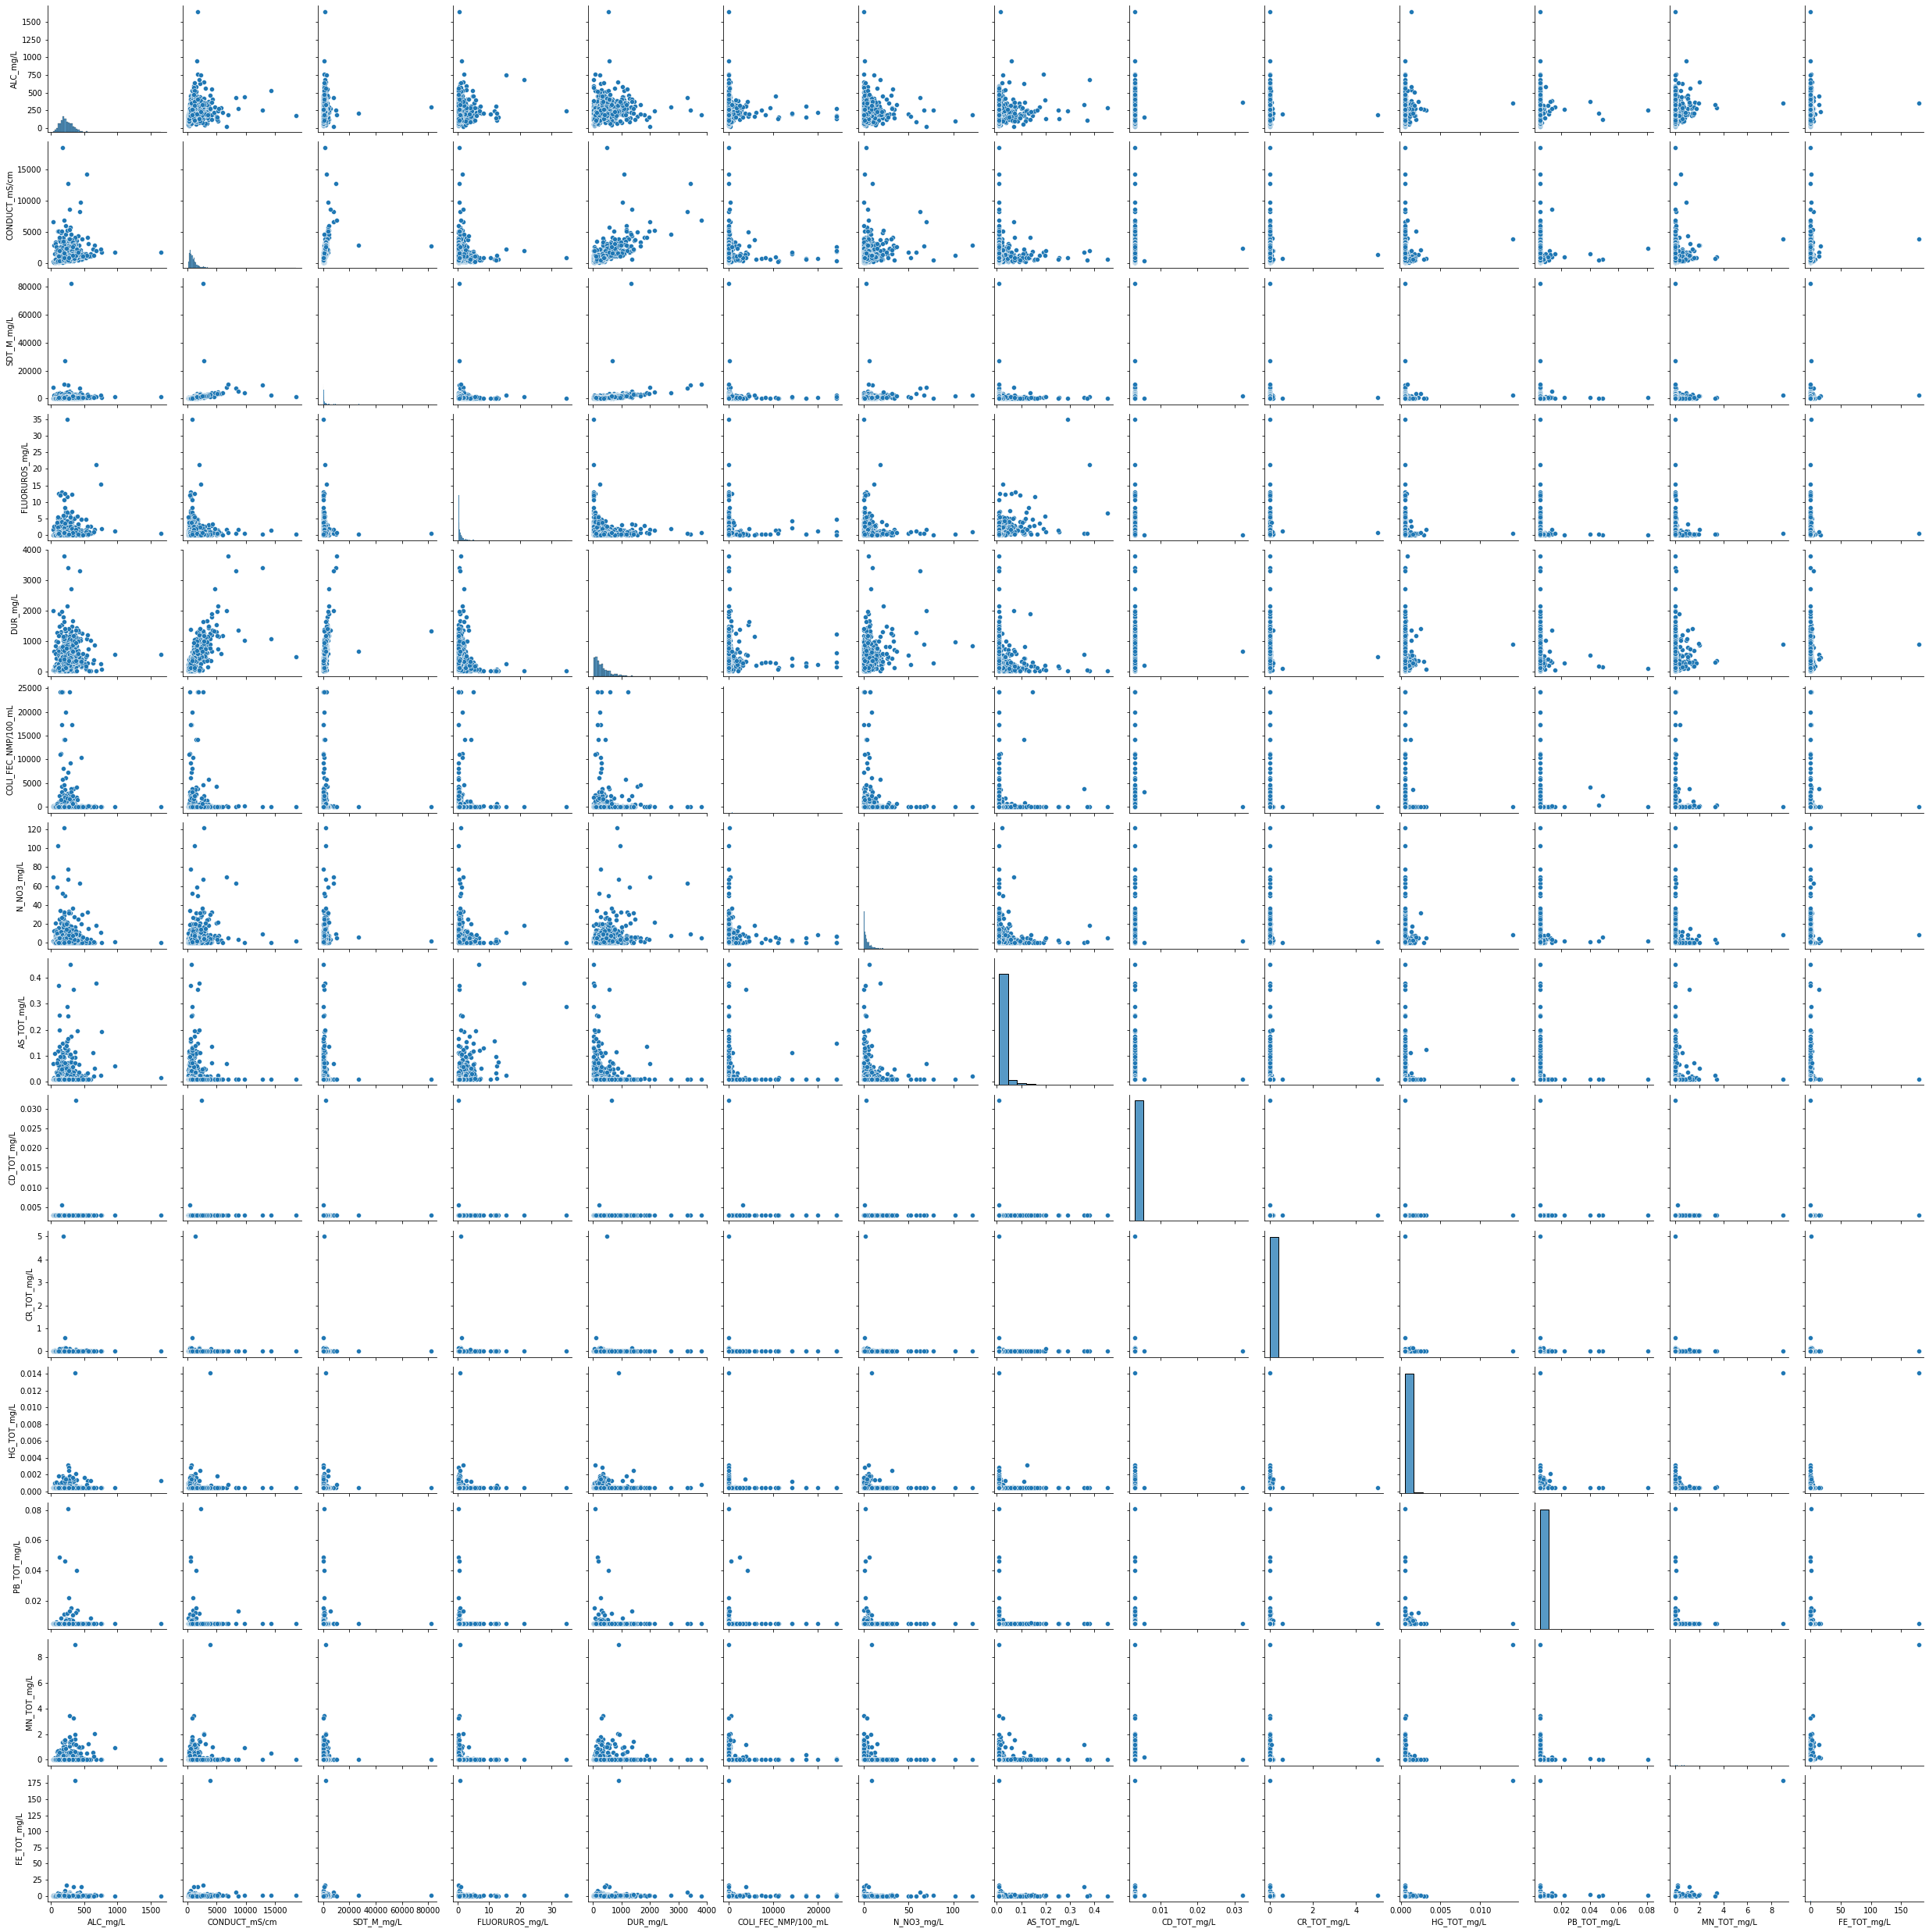

In [35]:
#Graficas de dispersión de las diferentes variables, estas
#nos permiten identificar visualmente la correlación de las
#variables o la dispersión.

sns.pairplot(df_explore)

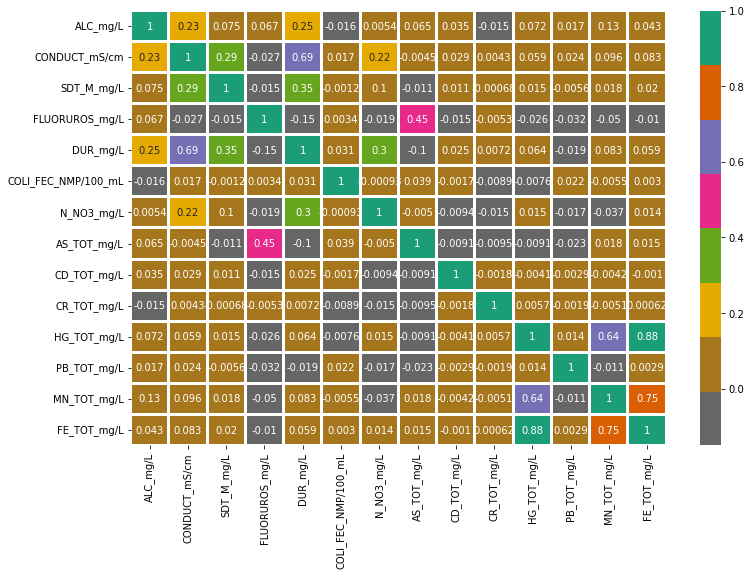

In [36]:
#Mapa de correlaciones nos permite identificar
#que variables se encuentran correlacionadas.
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.heatmap(df_explore.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [37]:
#Llamado a librerias para el graficado de las
#coordenadas de las localidades de las aguas subterraneas
import geopandas
from geopy.geocoders import Nominatim
import geopandas as gpd
from shapely.geometry import Point
import qeds
qeds.themes.mpl_style();

In [38]:
#Latitudes y Longitudes
latlong =Clean_df[["LATITUD","LONGITUD"]]
latlong["Coordinates"] = list(zip(latlong.LONGITUD, latlong.LATITUD))
latlong["Coordinates"] = latlong["Coordinates"].apply(Point)
latlong.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,LATITUD,LONGITUD,Coordinates
0,22.20887,-102.02210,POINT (-102.0221 22.20887)
1,21.99958,-102.20075,POINT (-102.20075 21.99958)
2,22.36685,-102.28801,POINT (-102.28801 22.36685)
3,22.18435,-102.29449,POINT (-102.29449 22.18435)
4,23.45138,-110.24480,POINT (-110.2448 23.45138)


In [39]:
gdf = gpd.GeoDataFrame(latlong, geometry="Coordinates")
gdf.head()


,LATITUD,LONGITUD,Coordinates
0,22.20887,-102.02210,POINT (-102.02210 22.20887)
1,21.99958,-102.20075,POINT (-102.20075 21.99958)
2,22.36685,-102.28801,POINT (-102.28801 22.36685)
3,22.18435,-102.29449,POINT (-102.29449 22.18435)
4,23.45138,-110.24480,POINT (-110.24480 23.45138)


In [40]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

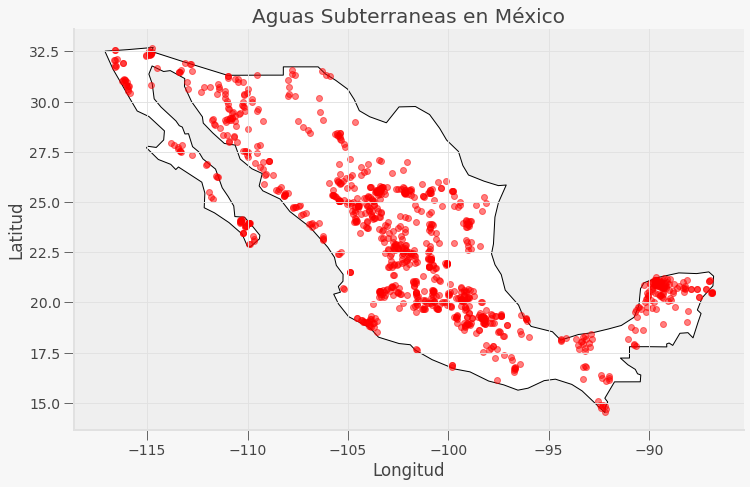

In [41]:
import matplotlib.pyplot as plt
fig, gax = plt.subplots(figsize=(12,12))

world.query("name == 'Mexico'").plot(ax=gax,
edgecolor='black',color='white')

gdf.plot(ax=gax, color='red', alpha = 0.5)
gax.set_xlabel('Longitud')
gax.set_ylabel('Latitud')
gax.set_title('Aguas Subterraneas en México')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
plt.show()

#*Realizar un análisis para encontrar si existe una relación entre la calidad de agua y su ubicación geográfica a través de K-means.





In [42]:
! pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
#Librerias para el análisis de K-MEANS
import scipy.spatial
from haversine import haversine
from sklearn.cluster import KMeans


In [44]:
#Revisión de los datos de latitud y longitud
latlong =Clean_df[["LATITUD","LONGITUD"]]
latlong.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 0 to 1067
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LATITUD   1054 non-null   float64
 1   LONGITUD  1054 non-null   float64
dtypes: float64(2)
memory usage: 24.7 KB


In [45]:
#Ajuste del modelo
kmeans = KMeans(n_clusters=3)
kmeans.fit(latlong)

KMeans(n_clusters=3)

In [46]:
#Centro obtenidos por el análisis de K-MEANS
centers = kmeans.cluster_centers_
print("'kmeans' model intances is trained and the cluster centroids are stored in 'centers'")
centers

'kmeans' model intances is trained and the cluster centroids are stored in 'centers'


array([[  22.27162356, -101.71558109],
       [  28.42037512, -110.74089614],
       [  19.47516461,  -90.69843377]])

Text(0, 0.5, 'Kmeans.inertia_')

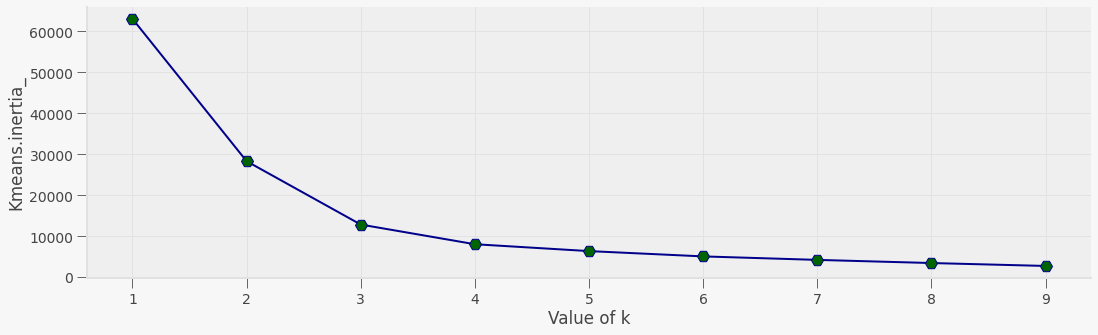

In [47]:
#Método de Codo, para obtener el valor de K-MEANS "Optimo" 
sum_square = {}
for k in range(1, 10):
 kmeans = KMeans(n_clusters=k).fit(latlong)
 sum_square[k] = kmeans.inertia_

fig,ax = plt.subplots(figsize=(18,5))
ax.plot(list(sum_square.keys()),
list(sum_square.values()),ls='-',marker='H', color='DarkBlue', lw=2, markersize=12,markerfacecolor = 'DarkGreen')
ax.set_xlabel("Value of k")
ax.set_ylabel("Kmeans.inertia_")

In [48]:
#Las coordenadas se encuentran etiquetadas a un determinado "Cluster"
#esto como resultado del análisis
clustering = KMeans(n_clusters = 3, max_iter= 10000)
clustering.fit(latlong)
Optimal_centers =  pd.DataFrame(clustering.cluster_centers_)
print("Los centroides se encuentran en las siguientes coordenadas:\n", clustering.cluster_centers_)
latlong["Cluster"] = clustering.labels_
latlong

Los centroides se encuentran en las siguientes coordenadas:
 [[  28.42037512 -110.74089614]
 [  19.47516461  -90.69843377]
 [  22.27162356 -101.71558109]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,LATITUD,LONGITUD,Cluster
0,22.20887,-102.02210,2
1,21.99958,-102.20075,2
2,22.36685,-102.28801,2
3,22.18435,-102.29449,2
4,23.45138,-110.24480,0
...,...,...,...
1063,24.76036,-99.54191,2
1064,24.78280,-99.70099,2
1065,25.55197,-99.82249,2
1066,24.80118,-100.32683,2


In [49]:
Optimal_centers

,0,1
0,28.420375,-110.740896
1,19.475165,-90.698434
2,22.271624,-101.715581


In [50]:

latlong["SEMAFORO"] = Clean_df['SEMAFORO']
latlong

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,LATITUD,LONGITUD,Cluster,SEMAFORO
0,22.20887,-102.02210,2,Verde
1,21.99958,-102.20075,2,Verde
2,22.36685,-102.28801,2,Rojo
3,22.18435,-102.29449,2,Verde
4,23.45138,-110.24480,0,Rojo
...,...,...,...,...
1063,24.76036,-99.54191,2,Rojo
1064,24.78280,-99.70099,2,Rojo
1065,25.55197,-99.82249,2,Rojo
1066,24.80118,-100.32683,2,Verde


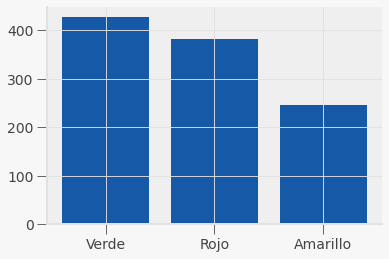

[427, 382, 245]

In [51]:
#Relación de la calidad del agua y su ubicación geográfica
x_values = latlong['SEMAFORO'].unique()
y_values = latlong['SEMAFORO'].value_counts().tolist()
plt.bar(x_values, y_values)
plt.show()
plt.close('all')
y_values

In [52]:
rslt_df_clt_0 = latlong[latlong['Cluster'] == 0]
rslt_df_clt_1 = latlong[latlong['Cluster'] == 1]
rslt_df_clt_2 = latlong[latlong['Cluster'] == 2]

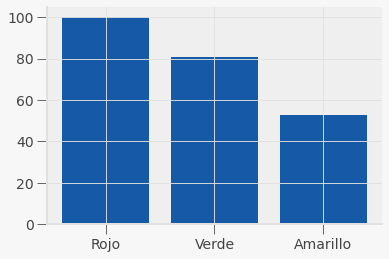

[100, 81, 53]

In [53]:
#Esta grafica de barras muestra el semafaro del "Cluster #0"
x_values = rslt_df_clt_0['SEMAFORO'].unique()
y_values = rslt_df_clt_0['SEMAFORO'].value_counts().tolist()
plt.bar(x_values, y_values)
plt.show()
plt.close('all')
y_values

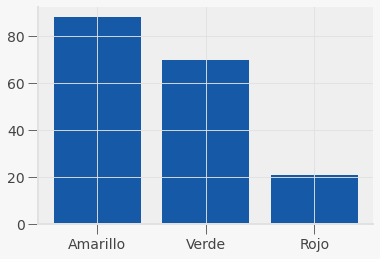

[88, 70, 21]

In [54]:
#Esta grafica de barras muestra el semafaro del "Cluster #1"
x_values = rslt_df_clt_1['SEMAFORO'].unique()
y_values = rslt_df_clt_1['SEMAFORO'].value_counts().tolist()
plt.bar(x_values, y_values)
plt.show()
plt.close('all')
y_values

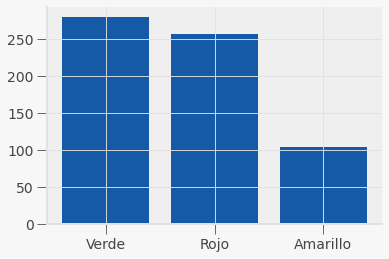

[280, 257, 104]

In [55]:
#Esta grafica de barras muestra el semafaro del "Cluster #2"
x_values = rslt_df_clt_2['SEMAFORO'].unique()
y_values = rslt_df_clt_2['SEMAFORO'].value_counts().tolist()
plt.bar(x_values, y_values)
plt.show()
plt.close('all')
y_values

In [56]:
latlong.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1054 entries, 0 to 1067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LATITUD   1054 non-null   float64
 1   LONGITUD  1054 non-null   float64
 2   Cluster   1054 non-null   int32  
 3   SEMAFORO  1054 non-null   object 
dtypes: float64(2), int32(1), object(1)
memory usage: 37.1+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


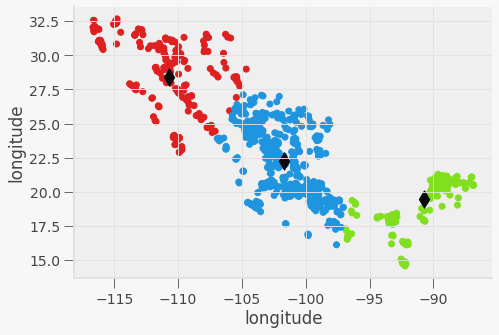

In [57]:
#Grafica de dispersion que muestra las diferentes "Cluster" y su respectivo "Centro".
colors = ["#DF2020", "#81DF20", "#2095DF"]
latlong["colormap"] = latlong.Cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

Lat = pd.DataFrame(latlong["LATITUD"])
Long = pd.DataFrame(latlong["LONGITUD"])
Clus = pd.DataFrame(latlong["colormap"])


plt.scatter(latlong.LONGITUD, latlong.LATITUD, c=latlong.colormap)
plt.scatter(Optimal_centers[1], Optimal_centers[0], marker = "d", s=150, color= "#0A0A0A")
plt.gcf().set_size_inches((7.5,5))

plt.xlabel("longitude")
plt.ylabel("longitude")
plt.show()

In [58]:
#Ubicación gregrafica de los "Centros de Cada Cluster"
geolocator = Nominatim(user_agent="geoapiExercises")
location_1 = geolocator.reverse(" 22.271624, -101.715581")
print(location_1)
location_2 = geolocator.reverse(" 19.475165, -90.698434")
print(location_2)
location_3 = geolocator.reverse("28.420375, -110.740896")
print(location_3)


Pinos, Zacatecas, México
Ciudad del Sol, Champotón, Campeche, México
Guaymas, Sonora, México


#Parte 2

In [59]:
#Preparación de los datos para el entrenamiento de los algoritmos de "Arbol de Decisión" y "Bosque Aleatorio"
df_train_test = Clean_df[["ALC_mg/L","CONDUCT_mS/cm","SDT_M_mg/L","FLUORUROS_mg/L","DUR_mg/L","COLI_FEC_NMP/100_mL","N_NO3_mg/L","AS_TOT_mg/L","CD_TOT_mg/L","CR_TOT_mg/L","HG_TOT_mg/L",
                 "PB_TOT_mg/L","MN_TOT_mg/L","FE_TOT_mg/L","SEMAFORO"]].copy()
df_train_test

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,SEMAFORO
0,229.990,940.0,603.6000,0.9766,213.7320,1.1,4.184656,0.0161,0.003,0.005,0.0005,0.005,0.00150,0.08910,Verde
1,231.990,608.0,445.4000,0.9298,185.0514,1.1,5.750110,0.0134,0.003,0.005,0.0005,0.005,0.00150,0.02500,Verde
2,204.920,532.0,342.0000,1.8045,120.7190,1.1,1.449803,0.0370,0.003,0.005,0.0005,0.005,0.00150,0.02500,Rojo
3,327.000,686.0,478.6000,1.1229,199.8790,1.1,1.258597,0.0154,0.003,0.005,0.0005,0.005,0.00150,0.02500,Verde
4,309.885,1841.0,1179.0000,0.2343,476.9872,291.0,15.672251,0.0100,0.003,0.005,0.0005,0.005,0.00150,0.02500,Rojo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,2350.0,1545.8000,0.2000,752.0960,1.1,14.615488,0.0100,0.003,0.005,0.0005,0.005,0.00150,0.02500,Rojo
1064,256.000,529.0,297.0000,0.2000,273.0000,1.1,77.392000,0.0100,0.003,0.005,0.0005,0.005,0.00709,0.07578,Rojo
1065,330.690,2600.0,1873.0000,0.7574,660.2126,620.0,36.477104,0.0100,0.003,0.005,0.0005,0.005,0.02420,0.21290,Rojo
1066,193.140,873.0,690.6667,0.7108,406.3680,1.1,0.020000,0.0100,0.003,0.005,0.0005,0.005,0.01200,0.17860,Verde


In [60]:
#Datos Preparados para el entrenamiento de los 
#modelos de Arbol de Decisión y Bosque Aleatorio
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

#Codificación de los "Targets"
df_train_test['SEMAFORO']= label_encoder.fit_transform(df_train_test['SEMAFORO'])
df_train_test

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L,SEMAFORO
0,229.990,940.0,603.6000,0.9766,213.7320,1.1,4.184656,0.0161,0.003,0.005,0.0005,0.005,0.00150,0.08910,2
1,231.990,608.0,445.4000,0.9298,185.0514,1.1,5.750110,0.0134,0.003,0.005,0.0005,0.005,0.00150,0.02500,2
2,204.920,532.0,342.0000,1.8045,120.7190,1.1,1.449803,0.0370,0.003,0.005,0.0005,0.005,0.00150,0.02500,1
3,327.000,686.0,478.6000,1.1229,199.8790,1.1,1.258597,0.0154,0.003,0.005,0.0005,0.005,0.00150,0.02500,2
4,309.885,1841.0,1179.0000,0.2343,476.9872,291.0,15.672251,0.0100,0.003,0.005,0.0005,0.005,0.00150,0.02500,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,231.045,2350.0,1545.8000,0.2000,752.0960,1.1,14.615488,0.0100,0.003,0.005,0.0005,0.005,0.00150,0.02500,1
1064,256.000,529.0,297.0000,0.2000,273.0000,1.1,77.392000,0.0100,0.003,0.005,0.0005,0.005,0.00709,0.07578,1
1065,330.690,2600.0,1873.0000,0.7574,660.2126,620.0,36.477104,0.0100,0.003,0.005,0.0005,0.005,0.02420,0.21290,1
1066,193.140,873.0,690.6667,0.7108,406.3680,1.1,0.020000,0.0100,0.003,0.005,0.0005,0.005,0.01200,0.17860,2


In [61]:
#Variables a utilizar para el entrenamiento y variable de salida
X = df_train_test[["ALC_mg/L","CONDUCT_mS/cm","SDT_M_mg/L","FLUORUROS_mg/L","DUR_mg/L","COLI_FEC_NMP/100_mL","N_NO3_mg/L","AS_TOT_mg/L","CD_TOT_mg/L","CR_TOT_mg/L","HG_TOT_mg/L",
                 "PB_TOT_mg/L","MN_TOT_mg/L","FE_TOT_mg/L"]]

y = df_train_test[["SEMAFORO"]]

print(X.shape)
print(y.shape)             

(1054, 14)
(1054, 1)


In [62]:
#Division de los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .80)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(843, 14)
(843, 1)
(211, 14)
(211, 1)


In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Crea el Arbol de Decisión
mdl_dt = DecisionTreeClassifier()

# Entrena el Clasificador de Arbol de Decisión
clf = mdl_dt.fit(X_train,y_train)

#Realiza Predicciones con los Datos de Prueba
y_pred = mdl_dt.predict(X_test)

In [64]:
#Metricas del Modelo de Arboles de Decision
target_names = ['clase 0', 'clase 1', 'clase 2']
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))


Accuracy: 0.985781990521327
              precision    recall  f1-score   support

     clase 0       0.97      0.97      0.97        40
     clase 1       0.99      0.97      0.98        73
     clase 2       0.99      1.00      0.99        98

    accuracy                           0.99       211
   macro avg       0.98      0.98      0.98       211
weighted avg       0.99      0.99      0.99       211



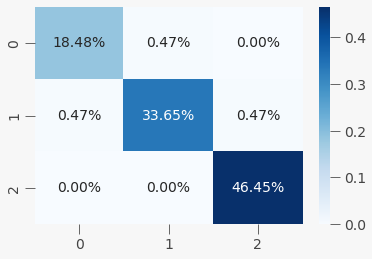

In [65]:
#Matriz de Confusion del Modelo de Arboles de Decision
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [66]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Crea el Bosque Aleatorio
mdl_rf=RandomForestClassifier(n_estimators=100)

#Entrena el Clasificador de Bosque Aleatorio
mdl_rf.fit(X_train,y_train)

#Realiza Predicciones con los Datos de Prueba
y_pred=mdl_rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [67]:
#Metricas del Modelo de Bosques Aleatorios
target_names = ['clase 0', 'clase 1', 'clase 2']
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 0.9715639810426541
              precision    recall  f1-score   support

     clase 0       0.95      0.97      0.96        40
     clase 1       0.97      0.96      0.97        73
     clase 2       0.98      0.98      0.98        98

    accuracy                           0.97       211
   macro avg       0.97      0.97      0.97       211
weighted avg       0.97      0.97      0.97       211



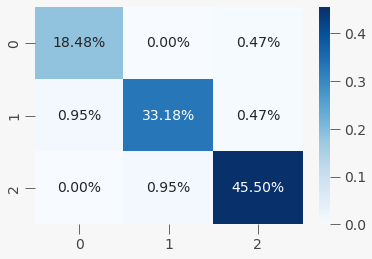

In [68]:
#Matriz de Confusion del Modelo de Bosque Aleatorios
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

Feature: 0, Score: 0.13077
Feature: 1, Score: 0.02305
Feature: 2, Score: 0.31446
Feature: 3, Score: 0.16901
Feature: 4, Score: 0.06828
Feature: 5, Score: 0.01115
Feature: 6, Score: 0.00512
Feature: 7, Score: 0.00857
Feature: 8, Score: 0.01987
Feature: 9, Score: 0.00812
Feature: 10, Score: 0.02312
Feature: 11, Score: 0.17730
Feature: 12, Score: 0.01812
Feature: 13, Score: 0.02306


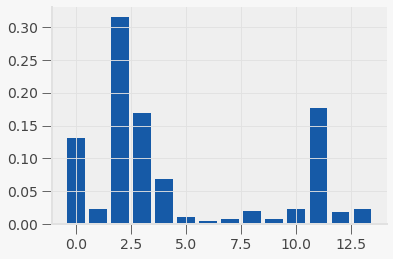

In [69]:
#Analisis de Caracteristicas de Importancia 
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# Conjunto de Datos
X, y = make_classification(n_samples=1000, n_features=14, n_informative=5, n_redundant=5, random_state=1)
# Definición del modelo
model = DecisionTreeClassifier()
# Entrenamiento del modelo
model.fit(X, y)
# Importancia de las caracteristicas
importance = model.feature_importances_
# Resumen de las caracteristicas de importancia
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# Graficado de las caracteristicas en una grafica de barras
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()